In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy

In [4]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

Consider the second-order differential equation

$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta-q\frac{d\theta}{dt}+Fsin(\Omega_D t)$

We can rewrite this as two coupled first-order equations:

$\frac{dy_0}{dt} = y_1$

$\frac{dy_1}{dt} = -\frac{g}{l}sin(y_0)-qy_1+Fsin(\Omega_D t)$

for the variables defined as $y_0 = \theta$ and $y_1 = \frac{d\theta}{dt}$


In [14]:
# Define the system of ODEs

def pendulum(t, y, g, l, q, F, OmegaD):
    return [y[1], -g/l * np.sin(y[0]) - q*y[1] + F*np.sin(OmegaD*t)]

In [20]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0 # Resistive force, q = a / ml
F = 0 # Driving force amplitude, F = G / ml^2
OmegaD = 2/3 # Frequency of the driving force (s^-1)

In [21]:
# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

In [19]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 1000
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

Text(0.5, 1.0, 'Pendulum motion')

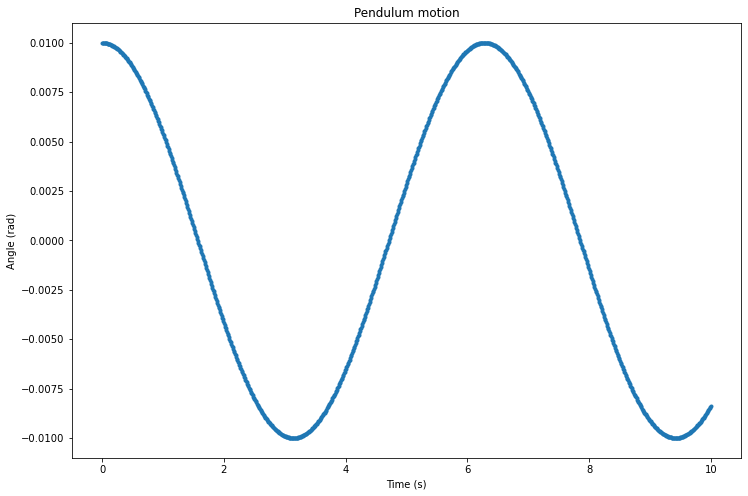

In [28]:
# Plot the motion of the pendulum

t = np.linspace(0, 10, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion')